# **MHT CET** **COUNSELLING COLLEGE PREDICTION** PROJECT BY ***VNBL***

Load dataset

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [ ]:


# Replace 'your_uploaded_file.csv' with the name of the uploaded file
df = pd.read_csv('mht_cet1.csv')




In [ ]:
df.head()


,college_name,score_type,seat_type,branch,sum,count,max,min,mean,max-min,max-mean
0,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,TFWS,Computer Engineering,299.638141,3,99.913236,99.843394,99.879380,0.069842,0.033856
1,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,LOPENS,Computer Engineering,699.371128,7,100.000000,99.829843,99.910161,0.170156,0.089839
2,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,GOPENS,Computer Engineering,1698.390955,17,99.995273,99.817615,99.905350,0.177659,0.089923
3,COEP Technological University,MHT-CET,GNT3S,Computer Engineering,99.803612,1,99.803612,99.803612,99.803612,0.000000,0.000000
4,COEP Technological University,MHT-CET,LNT2S,Computer Engineering,99.787304,1,99.787304,99.787304,99.787304,0.000000,0.000000


In [ ]:
# find attribute / collums in file
col_name= df.columns
print("Columns")
print(col_name)

Columns
Index(['college_name', 'score_type', 'seat_type', 'branch', 'sum', 'count',
       'max', 'min', 'mean', 'max-min', 'max-mean'],
      dtype='object')


In [ ]:
df.head()  # to check first few rows ans colm are loaded or not

,college_name,score_type,seat_type,branch,sum,count,max,min,mean,max-min,max-mean
0,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,TFWS,Computer Engineering,299.638141,3,99.913236,99.843394,99.879380,0.069842,0.033856
1,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,LOPENS,Computer Engineering,699.371128,7,100.000000,99.829843,99.910161,0.170156,0.089839
2,Veermata Jijabai Technological Institute(VJTI)...,MHT-CET,GOPENS,Computer Engineering,1698.390955,17,99.995273,99.817615,99.905350,0.177659,0.089923
3,COEP Technological University,MHT-CET,GNT3S,Computer Engineering,99.803612,1,99.803612,99.803612,99.803612,0.000000,0.000000
4,COEP Technological University,MHT-CET,LNT2S,Computer Engineering,99.787304,1,99.787304,99.787304,99.787304,0.000000,0.000000


In [ ]:
# check missing values
mis_val=df.isnull().sum()

# now display with missing values
colm_with_mis_values=mis_val[mis_val> 0]
print("colm_with_mis_values")
print(colm_with_mis_values)


colm_with_mis_values
Series([], dtype: int64)


In [ ]:
# remove duplicates from dataframe
df= df.drop_duplicates()

# print , df.shape to verify duplicates have been removed
print("Duplicates removed,Shape of dataframe : " ,df.shape)

Duplicates removed,Shape of dataframe :  (28377, 11)


In [ ]:
# conver multiple columns to float
float_columns=['sum','count','max','min','max-min','max-mean']
df[float_columns]=df[float_columns].astype(float)


Statistics part + visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#calculate basic statistics
numeric_stats= df.describe()
# print statistics
print("asic statistics for numeric colmns: ")
print(numeric_stats)


asic statistics for numeric colmns: 
                sum         count           max           min          mean  \
count  28377.000000  28377.000000  28377.000000  28377.000000  28377.000000   
mean     233.107703      3.677098     59.974110     52.102999     55.774946   
std      451.505203      5.807874     26.164252     28.700460     26.526845   
min        0.004739      1.000000      0.004739      0.004739      0.004739   
25%       48.141988      1.000000     41.187314     26.900779     34.329932   
50%       84.382602      2.000000     64.060928     55.218152     58.566008   
75%      242.888443      4.000000     81.973434     76.990020     78.391101   
max     9076.725302     92.000000    100.000000     99.843394     99.910161   

            max-min      max-mean  
count  28377.000000  28377.000000  
mean       7.871111      4.199164  
std       14.426868      7.838619  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.060330      0.028206  

In [ ]:
# Visualize the data distribution of numeric features
numeric_columns = ['sum', 'count', 'max', 'min', 'mean', 'max-min', 'max-mean']

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

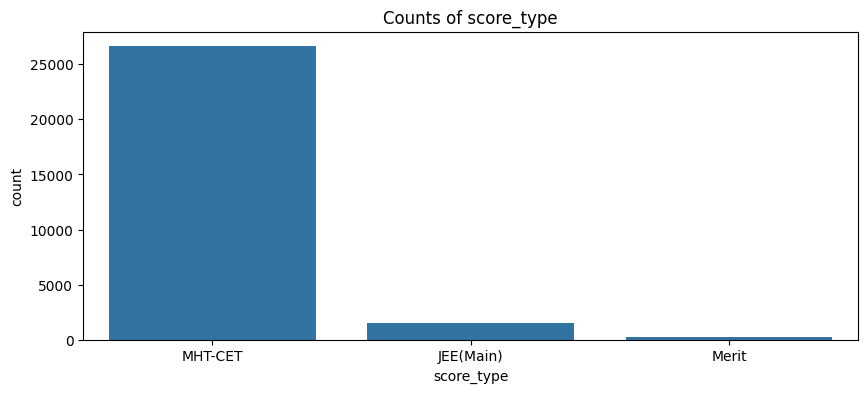

In [ ]:
# Visualize categorical features using bar plots or count plots
categorical_columns=['score_type','seat_type','branch']

for col in categorical_columns:
  plt.figure(figsize=(10,4))
  sns.countplot(data=df,x=col,order=df[col].value_counts().index)
  plt.title(f'Counts of {col}')
  plt.xlable(col)
  plt.ylable('Count')
  plt.xticks(rotation=45)
  plt.show()


In [ ]:
branch_seat_counts = df.groupby(['college_name', 'branch', 'seat_type']).size().reset_index(name='count')


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from ipywidgets import widgets
from IPython.display import display, clear_output


# Define the features (X) and target (y)
features = ['max', 'min', 'max-min', 'max-mean']
X = df[features]
y = df['college_name'] + ' - ' + df['branch']

# Create a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Create input widgets for max, min, max-min, and max-mean
max_input = widgets.FloatText(value=0, description='Max:')
min_input = widgets.FloatText(value=0, description='Min:')
max_min_input = widgets.FloatText(value=0, description='Max-Min:')
max_mean_input = widgets.FloatText(value=0, description='Max-Mean:')

# Create a button for prediction
predict_button = widgets.Button(description='Predict College & Branch')

# Function to predict college and branch
def predict_college_branch(_):
    clear_output()
    max_val = max_input.value
    min_val = min_input.value
    max_min_val = max_min_input.value
    max_mean_val = max_mean_input.value

    input_data = [[max_val, min_val, max_min_val, max_mean_val]]
    predicted_class = model.predict(input_data)

    if predicted_class:
        print(f"Predicted College & Branch: {predicted_class[0]}")
    else:
        print("Prediction not available.")

# Bind the button click event to the predict_college_branch function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(max_input, min_input, max_min_input, max_mean_input, predict_button)


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output


In [ ]:
import pandas as pd

# Replace 'your_uploaded_file.csv' with the name of the uploaded file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mht_cet1.csv')




In [ ]:
# Create dropdown widgets for college, branch, TFWS, and percentile
college_dropdown = widgets.Dropdown(options=['All'] + df['college_name'].unique(), description='College:')
branch_dropdown = widgets.Dropdown(options=['All'] + df['branch'].unique(), description='Branch:')
tfws_checkbox = widgets.Checkbox(value=False, description='TFWS')
percentile_input = widgets.FloatText(value=0, description='Percentile:', step=0.01)

# Create a button for submission
submit_button = widgets.Button(description='Submit')

# Function to display information or prediction
def display_info(_):
    clear_output()
    college = college_dropdown.value
    branch = branch_dropdown.value
    tfws = tfws_checkbox.value
    percentile = percentile_input.value

    filtered_data = df.copy()

    if college != 'All':
        filtered_data = filtered_data[filtered_data['college_name'] == college]
    if branch != 'All':
        filtered_data = filtered_data[filtered_data['branch'] == branch]
    if tfws:
        filtered_data = filtered_data[filtered_data['seat_type'] == 'TFWS']
    if percentile > 0:
        filtered_data = filtered_data[filtered_data['percentile'] >= percentile]

    if not filtered_data.empty:
        display(filtered_data)
    else:
        print("No results found.")

# Bind the button click event to the display_info function
submit_button.on_click(display_info)

# Display the widgets
display(college_dropdown, branch_dropdown, tfws_checkbox, percentile_input, submit_button)


Dropdown(description='College:', options=('AllVeermata Jijabai Technological Institute(VJTI), Matunga, Mumbai'…

Dropdown(description='Branch:', options=('AllComputer Engineering', 'AllInformation Technology', 'AllElectroni…

Checkbox(value=False, description='TFWS')

FloatText(value=0.0, description='Percentile:', step=0.01)

Button(description='Submit', style=ButtonStyle())

model

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
import pandas as pd

# Replace 'your_uploaded_file.csv' with the name of the uploaded file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mht_cet1.csv')




In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output


# Create input widgets for percentile
percentile_input = widgets.FloatText(value=0, description='Percentile:', step=0.01)

# Create a button for prediction
predict_button = widgets.Button(description='Predict College & Branch')

# Function to predict college and branch based on percentile
def predict_college_branch(_):
    clear_output()
    percentile = percentile_input.value

    # Calculate the percentile range
    min_percentile = df['min'].quantile(percentile)
    max_percentile = df['max'].quantile(percentile)

    # Filter the dataset based on the percentile range
    filtered_data = df[(df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

    if not filtered_data.empty:
        college_branch_list = filtered_data[['college_name', 'branch']].values.tolist()[:20]  # Display the first 20 results
        print("Colleges & Branches within the Percentile Range:")
        for college, branch in college_branch_list:
            print(f"{college} - {branch}")
    else:
        print("No results found within the specified percentile range.")

# Bind the button click event to the predict_college_branch function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(percentile_input, predict_button)


FloatText(value=0.0, description='Percentile:', step=0.01)

Button(description='Predict College & Branch', style=ButtonStyle())

In [ ]:
.import pandas as pd

# Load the dataset (assuming the file is already uploaded)

# Get user inputs
percentile = float(input("Enter a percentile value (e.g., 0.9 for 90th percentile): "))
branch = input("Enter a branch: ")

# Calculate the percentile range
min_percentile = df['min'].quantile(percentile)
max_percentile = df['max'].quantile(percentile)

# Filter the dataset based on the percentile and branch
filtered_data = df[(df['min'] >= min_percentile) & (df['max'] <= max_percentile) & (df['branch'] == branch)]

if not filtered_data.empty:
    college_branch_list = filtered_data[['college_name', 'branch']].values.tolist()
    print("Colleges & Branches within the specified percentile and branch:")
    for college, branch in college_branch_list:
        print(f"{college} - {branch}")
else:
    print("No results found within the specified criteria.")


In [ ]:
import pandas as pd

# Load your filtered dataset here
# Replace 'your_filtered_dataset.csv' with the actual filename


# Define a function for predicting college and branch based on percentile and branch
def predict_college_branch(branch, percentile):
    if percentile < 0 or percentile > 100:
        return "Percentile should be within the range [0, 100]."

    if branch not in df['branch'].unique():
        return "Branch not found in the dataset."

    min_percentile = df['min'].quantile(percentile / 100)
    max_percentile = df['max'].quantile(percentile / 100)

    filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

    if not filtered_data.empty:
        result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
        return result_table
    else:
        return "No results found within the specified criteria."

# Example usage:
branch_input = "Computer Engineering"
percentile_input = 80  # Example percentile value

result = predict_college_branch(branch_input, percentile_input)
print(result)


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Load your filtered dataset here
# Replace 'your_filtered_dataset.csv' with the actual filename


# Create dropdown widgets for branch and percentile
branch_dropdown = widgets.Dropdown(
    options=df['branch'].unique(),
    description='Branch:',
)

percentile_slider = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Percentile:',
)

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Create an output widget for displaying the results
output = widgets.Output()

# Function to predict college and branch based on user input
def predict_college_branch(_):
    branch = branch_dropdown.value
    percentile = percentile_slider.value

    with output:
        output.clear_output()

        min_percentile = df['min'].quantile(percentile / 100)
        max_percentile = df['max'].quantile(percentile / 100)

        filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

        if not filtered_data.empty:
            result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
            display(result_table)
        else:
            print("No results found within the specified criteria.")

# Bind the button click event to the prediction function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(branch_dropdown, percentile_slider, predict_button, output)


Dropdown(description='Branch:', options=('Computer Engineering', 'Information Technology', 'Electronics and Te…

FloatSlider(value=50.0, description='Percentile:', step=1.0)

Button(description='Predict', style=ButtonStyle())

Output()

In [ ]:
!pip install python-docx


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from docx import Document



# Create dropdown widgets for branch and percentile
branch_dropdown = widgets.Dropdown(
    options=df['branch'].unique(),
    description='Branch:',
)

percentile_slider = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Percentile:',
)

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Function to predict college and branch based on user input
def predict_college_branch(_):
    branch = branch_dropdown.value
    percentile = percentile_slider.value

    document = Document()  # Create a Word document

    # Add the title at the top of the document
    document.add_heading('VNBL MHT-CET COUNSELLING', 0)

    min_percentile = df['min'].quantile(percentile / 100)
    max_percentile = df['max'].quantile(percentile / 100)

    filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

    if not filtered_data.empty:
        result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
        # Add the table to the document
        table = document.add_table(result_table.shape[0] + 1, result_table.shape[1])
        for i in range(result_table.shape[0] + 1):
            for j in range(result_table.shape[1]):
                cell = table.cell(i, j)
                if i == 0:
                    cell.text = result_table.columns[j]
                else:
                    cell.text = str(result_table.iloc[i - 1, j])

        # Save the document to a file
        docx_filename = 'predicted_colleges.docx'
        document.save(docx_filename)
        print(f"Results saved to {docx_filename}")
    else:
        print("No results found within the specified criteria.")

# Bind the button click event to the prediction function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(branch_dropdown, percentile_slider, predict_button)


**Main Model **



In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
from docx import Document
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT


# Create dropdown widgets for branch and percentile
branch_dropdown = widgets.Dropdown(
    options=df['branch'].unique(),
    description='Branch:',
)

percentile_slider = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Percentile:',
)

student_name_input = widgets.Text(
    description='Student Name:',
)

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Create an output widget for displaying the results
output = widgets.Output()

# Function to predict college and branch based on user input
def predict_college_branch(_):
    branch = branch_dropdown.value
    percentile = percentile_slider.value
    student_name = student_name_input.value

    with output:
        output.clear_output()

        min_percentile = df['min'].quantile(percentile / 100)
        max_percentile = df['max'].quantile(percentile / 100)

        filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

        if not filtered_data.empty:
            # Predict using Random Forest
            X = df[['min', 'max']]
            y = df['branch']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            clf = RandomForestClassifier()
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Create a document
            document = Document()
            document.add_heading('VNBL MHT-CET COUNSELLING', 0)

            # Add student details in a box
            student_details = document.add_paragraph()
            student_details.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            student_run = student_details.add_run(f'Student: {student_name}   Branch: {branch}   Percentile: {percentile}')
            student_run.font.size = Pt(12)

            # Add predicted college list in tabular form
            result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
            table = document.add_table(rows=len(result_table) + 1, cols=len(result_table.columns))
            table.style = 'Table Grid'
            for i, column in enumerate(result_table.columns):
                table.cell(0, i).text = column
            for r, row in enumerate(result_table.iterrows()):
                for c, value in enumerate(row[1]):
                    table.cell(r + 1, c).text = str(value)

            # Save the document to a file
            docx_filename = '/content/predicted_colleges.docx'
            document.save(docx_filename)
            print(f"Results saved to {docx_filename}")

            display(HTML(f"<a href='{docx_filename}' download>Download DOC File</a>"))
        else:
            print("No results found within the specified criteria.")

# Bind the button click event to the prediction function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(student_name_input, branch_dropdown, percentile_slider, predict_button, output)


Text(value='', description='Student Name:')

Dropdown(description='Branch:', options=('Computer Engineering', 'Information Technology', 'Electronics and Te…

FloatSlider(value=50.0, description='Percentile:', step=1.0)

Button(description='Predict', style=ButtonStyle())

Output()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame
# Let's assume you have columns: 'percentile', 'sum', 'count', 'max', 'min', 'mean', 'max-min', 'max-mean', 'category'

# Select features and target
X = df[['percentile', 'sum', 'count', 'max', 'min', 'mean', 'max-min', 'max-mean', 'category']]
y = df['']  # Replace 'target' with your actual target column

# One-hot encode categorical column
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = pd.concat([X.drop('category', axis=1), pd.DataFrame(encoder.fit_transform(X[['category']]))], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame with the specified columns
# If not, replace it with your actual DataFrame

# Select relevant columns
selected_columns = ['sum', 'count', 'max', 'min', 'mean', 'max-min', 'max-mean', 'branch']
df_selected = df[selected_columns]

# Convert 'branch' to numeric using label encoding
df_selected['branch'] = df_selected['branch'].astype('category').cat.codes

# Split the data into features (X) and target (y)
X = df_selected.drop('branch', axis=1)
y = df_selected['branch']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Now, you can use this model to predict the branch for new data
# For example, if you have a new data point 'X_new', you can use:
# predicted_branch = model.predict(X_new)


Mean Squared Error: 387.35052682814484


<ipython-input-7-7b6d641e6e30>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['branch'] = df_selected['branch'].astype('category').cat.codes


In [ ]:
# Model trainaing and prediction function
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, HTML
from docx import Document
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

# Create dropdown widgets for branch and percentile
branch_dropdown = widgets.Dropdown(
    options=df['branch'].unique(),
    description='Branch:',
)

percentile_slider = widgets.FloatSlider(
    value=50,
    min=0,
    max=100,
    step=1,
    description='Percentile:',
)

student_name_input = widgets.Text(
    description='Student Name:',
)

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Create an output widget for displaying the results
output = widgets.Output()

# Function to predict college and branch based on user input
def predict_college_branch(_):
    branch = branch_dropdown.value
    percentile = percentile_slider.value
    student_name = student_name_input.value

    with output:
        output.clear_output()

        min_percentile = df['min'].quantile(percentile / 100)
        max_percentile = df['max'].quantile(percentile / 100)

        filtered_data = df[(df['branch'] == branch) & (df['min'] >= min_percentile) & (df['max'] <= max_percentile)]

        if not filtered_data.empty:
            # Predict using Linear Regression
            X = df[['min', 'max']]
            y = df['branch']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)

            # Create a document
            document = Document()
            document.add_heading('VNBL MHT-CET COUNSELLING', 0)

            # Add student details in a box
            student_details = document.add_paragraph()
            student_details.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER
            student_run = student_details.add_run(f'Student: {student_name}   Branch: {branch}   Percentile: {percentile}')
            student_run.font.size = Pt(12)

            # Add predicted college list in tabular form
            result_table = filtered_data[['college_name', 'branch', 'min', 'max']]
            table = document.add_table(rows=len(result_table) + 1, cols=len(result_table.columns))
            table.style = 'Table Grid'
            for i, column in enumerate(result_table.columns):
                table.cell(0, i).text = column
            for r, row in enumerate(result_table.iterrows()):
                for c, value in enumerate(row[1]):
                    table.cell(r + 1, c).text = str(value)

            # Save the document to a file
            docx_filename = '/content/predicted_colleges.docx'
            document.save(docx_filename)
            print(f"Results saved to {docx_filename}")

            display(HTML(f"<a href='{docx_filename}' download>Download DOC File</a>"))
        else:
            print("No results found within the specified criteria.")

# Bind the button click event to the prediction function
predict_button.on_click(predict_college_branch)

# Display the widgets
display(student_name_input, branch_dropdown, percentile_slider, predict_button, output)
print(mse)


Text(value='', description='Student Name:')

Dropdown(description='Branch:', options=('Computer Engineering', 'Information Technology', 'Electronics and Te…

FloatSlider(value=50.0, description='Percentile:', step=1.0)

Button(description='Predict', style=ButtonStyle())

Output()

NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

X = df[['min', 'max']]
y = df['branch']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

NameError: ignored